In [9]:
import pandas as pd

# Read in Zip file
zip_path = '/International_Trade_Database.zip'

# Turn Zip file into CSV
df = pd.read_csv(zip_path, compression='zip')
print(df)

       ReporterISO3 ReporterName PartnerISO3 PartnerName  Year TradeFlowName  \
0               AFG  Afghanistan         SWE      Sweden  2017        Export   
1               AFG  Afghanistan         JOR      Jordan  2018        Export   
2               AFG  Afghanistan         JOR      Jordan  2017        Export   
3               AFG  Afghanistan         ITA       Italy  2018        Export   
4               AFG  Afghanistan         ITA       Italy  2017        Export   
...             ...          ...         ...         ...   ...           ...   
634504          ZWE     Zimbabwe         BRA      Brazil  2000        Export   
634505          ZWE     Zimbabwe         BOL     Bolivia  2000        Export   
634506          ZWE     Zimbabwe         BMU     Bermuda  2002        Export   
634507          ZWE     Zimbabwe         BLZ      Belize  2000        Export   
634508          ZWE     Zimbabwe         ZMB      Zambia  2011        Export   

        TradeValue in 1000 USD  
0     

(array([11879.,  8294.,  8784., 11055., 12283., 13258., 14436., 15397.,
        16388., 16750., 37970., 20584., 20934., 21419., 22000., 21897.,
        22309., 22791., 22961., 23139., 47199., 23276., 23735., 23539.,
        24022., 24051., 23957., 23731., 23009., 33462.]),
 array([1988. , 1989.1, 1990.2, 1991.3, 1992.4, 1993.5, 1994.6, 1995.7,
        1996.8, 1997.9, 1999. , 2000.1, 2001.2, 2002.3, 2003.4, 2004.5,
        2005.6, 2006.7, 2007.8, 2008.9, 2010. , 2011.1, 2012.2, 2013.3,
        2014.4, 2015.5, 2016.6, 2017.7, 2018.8, 2019.9, 2021. ]),
 <BarContainer object of 30 artists>)

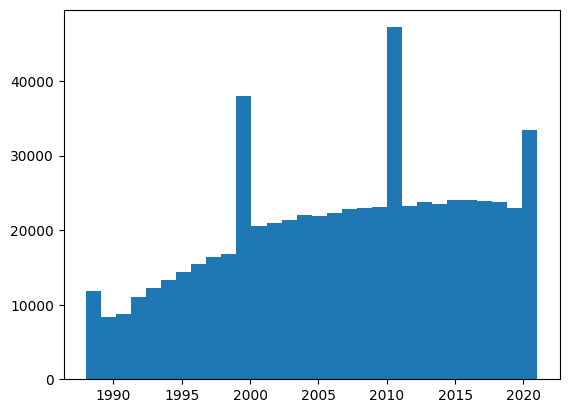

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['Year'], bins= 30)

Less data in the past them currently. May want to limit data usage to post 2000.

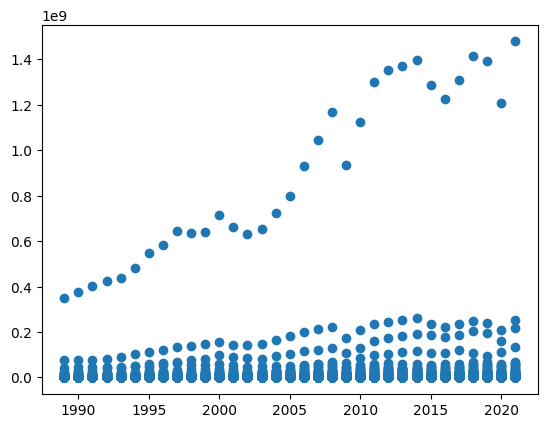

In [11]:
#Filter for a single country
us_exports_df = df[(df['ReporterName'] == 'United States') & (df['TradeFlowName'] == 'Export')]

plt.scatter(us_exports_df['Year'], us_exports_df['TradeValue in 1000 USD'])

Export go up for the USA. The scotter plot is showing a positive trend for USA.

ReporterISO3
CHN    5.181201e+09
EUN    4.349507e+09
DEU    2.771705e+09
USA    2.414235e+09
JPN    1.282565e+09
HKG    1.103032e+09
NLD    1.102706e+09
KOR    1.025420e+09
FRA    9.771249e+08
ITA    9.625942e+08
MEX    8.339643e+08
SGP    7.473675e+08
GBR    7.402990e+08
CAN    7.108335e+08
OAS    6.943891e+08
RUS    6.742079e+08
CHE    6.371608e+08
ESP    6.134728e+08
BEL    5.922612e+08
VNM    5.628829e+08
Name: TradeValue in 1000 USD, dtype: float64


<BarContainer object of 20 artists>

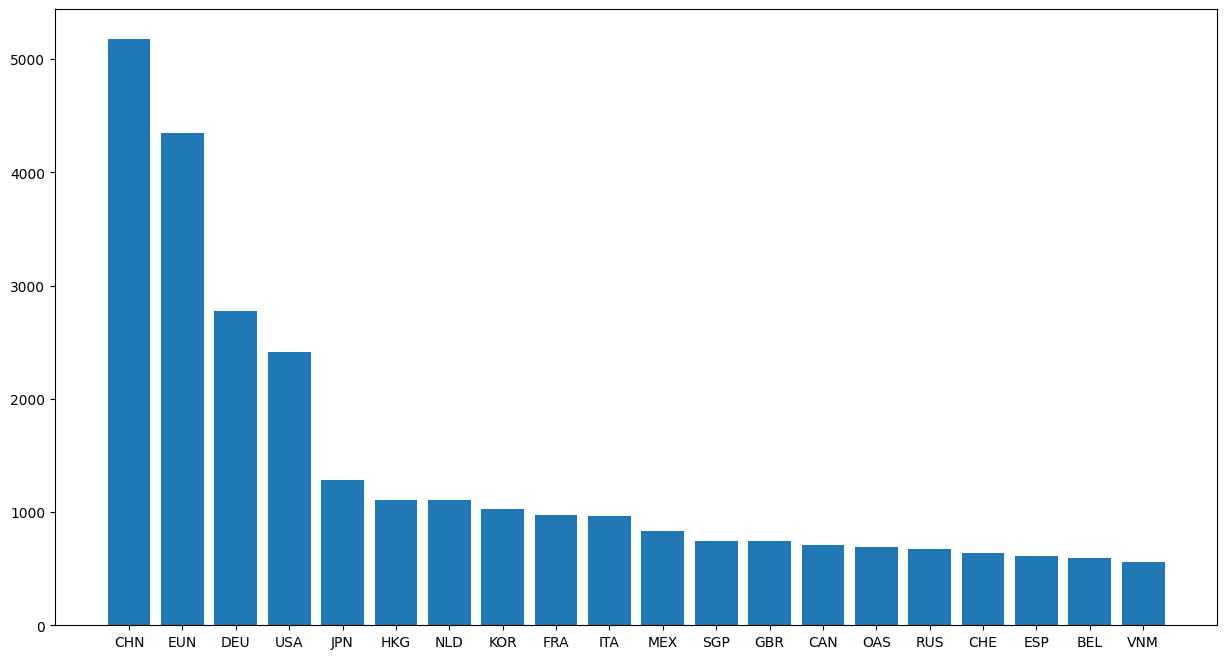

In [12]:
# Filter data for 2020 and Exports
df_2020_Exports = df[(df['Year'] == 2020) & (df['TradeFlowName'] == 'Export')]

# Find the sum of each countries exports for the year and keep 20 largest
top_20 = df_2020_Exports.groupby('ReporterISO3')['TradeValue in 1000 USD'].sum().nlargest(20)
print(top_20)

# Maqke figure larger si it is more visible
plt.figure(figsize=(15, 8))

# Change Eports values from thousand to billions so I is more understandable
y_values_in_billions = top_20.values / 1_000_000

# Bar chart that shows the highest Exporters
plt.bar(top_20.index, y_values_in_billions)

Creates a bar chart that list the largest exporters for the year 2020